# **GROUP 19**
## Final Year Project
## Topic - Graph Exploration Problem



---

### **Team Members**

1.   Rishi Srivastava (302211001002)
2.   Arka Ghosh (302211001008)
3.   Sayandeb Sarkar (302211001013)



# ***Algorithm***

## ***High-Level Overview***

### 1. DFS Exploration:
The algorithm mimics a Depth-First Search (DFS) approach to explore the graph.

### 2. Scouting:
Unsettled agents are used as scouts to explore neighbors and report back their status.

### 3. Root Initialization:
- The root node is included in the MIS.
- The agent at the root settles, takes the color red, and becomes part of the MIS.

### 4. Node Decision:
- A node becomes part of the MIS (color red) only if none of its neighbors are already in the MIS.
- If a neighbor is in the MIS, the node is excluded and colored blue.

# Agent State Variables
Each agent (r_i) maintains the following variables:

### - State Variables:
- `r_i.state`: Current state of the agent (e.g., scout, return).
- `r_i.phase`: Phase of the DFS (`forward` or `backtrack`).
- `r_i.color`: Agent's assigned color (`black`, `red`, or `blue`).
- `r_i.settled`: Indicates whether the agent has settled.

### - Scouting Variables:
- `r_i.scoutport`: Port being scouted at the current node.
- `r_i.scoutparent`: Parent port at the scouted neighbor.
- `r_i.target`: Information about the scouted node (`empty`, `red`, `blue`).

### - Traversal Variables:
- `r_i.parent`: Parent node in the DFS tree.
- `r_i.recent`: Last port visited at the current node.
- `r_i.next`: Next port leading to an unsettled node.

# Phases of the Algorithm

### 1. Forward Phase:
- Explore new nodes.
- If a node is empty, an agent settles there, updating its state and color.

### 2. Backtrack Phase:
- Return to the parent node when no further empty nodes are found.

# Execution Process

### 1. Initialization (Round 1):
- All agents start at the root node (`v`).
- The agent with the highest ID settles, becomes part of the MIS (color red), and initializes `next = 0`.
- Unsettled agents exit (`v`) through port 0.

### 2. Node Exploration:
At a new node (`u`):
- The highest ID agent among the unsettled agents settles at (`u`).
- Unsettled agents scout neighbors of (`u`) through available ports.
- Neighbors are classified as:
  - **Empty** (no settled agent).
  - **Red** (neighbor is part of the MIS).
  - **Blue** (neighbor is excluded from the MIS).

### 3. Scouting and Decision:
- Agents report scouting results:
  - If no red neighbors are found, the node becomes part of the MIS.
  - Otherwise, it is excluded (color blue).
- Update `recent` and `next` variables for further exploration.

### 4. Completion:
- If all neighbors are scouted and no red neighbor exists, the node is added to the MIS.
- If no `next` port is available, agents backtrack to the parent node.

### 5. Final Settling:
- The algorithm continues until all agents except one settle.
- The last unsettled agent completes the DFS traversal and finalizes the MIS.

# Key Observations

### 1. Distributed Nature:
The algorithm uses local state and communication between agents to make global decisions.

### 2. Rooted Initialization:
Ensures deterministic outcomes by starting from a designated root node.

### 3. Scouting Efficiency:
Unsettled agents efficiently explore neighbors, avoiding redundant operations.


# ***Code Implementation***

Enter the number of agents: 3
Enter the starting node: 2
Step 0: Root node 2 settled (red).


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128100 (\N{BUST IN SILHOUETTE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


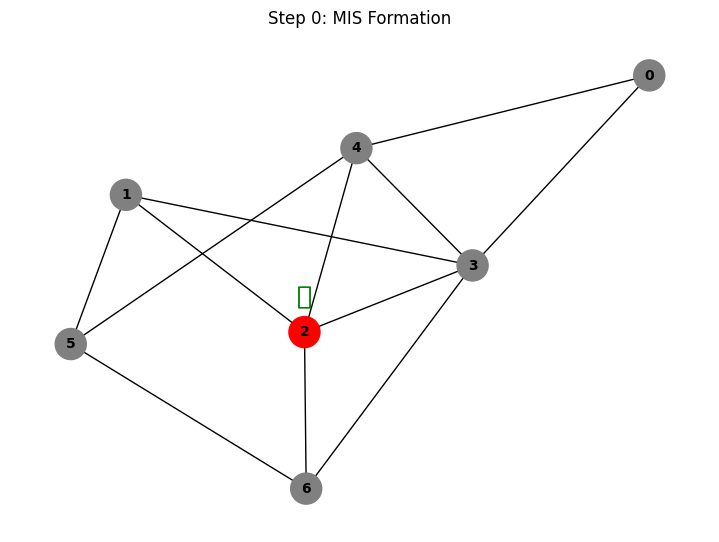

Step 1: Agent 2 moved from node 2 to node 1.
Step 1: Agent 3 moved from node 2 to node 3.


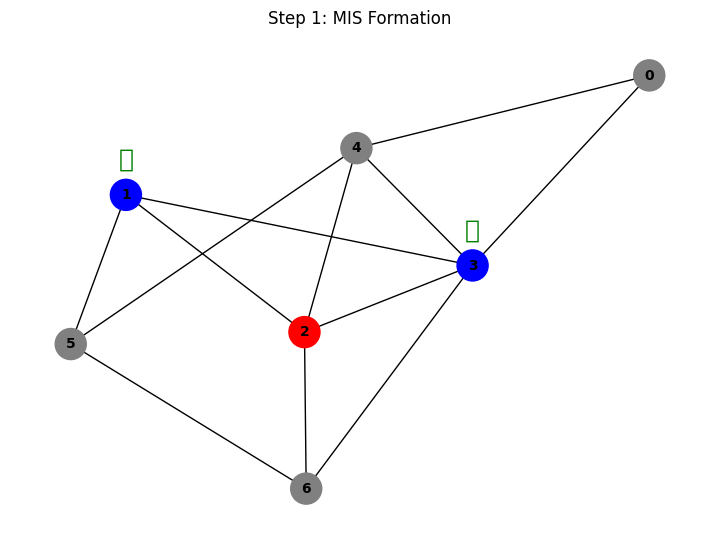

Step 2: Agent 2 moved from node 1 to node 5.
Step 2: Agent 3 moved from node 3 to node 0.


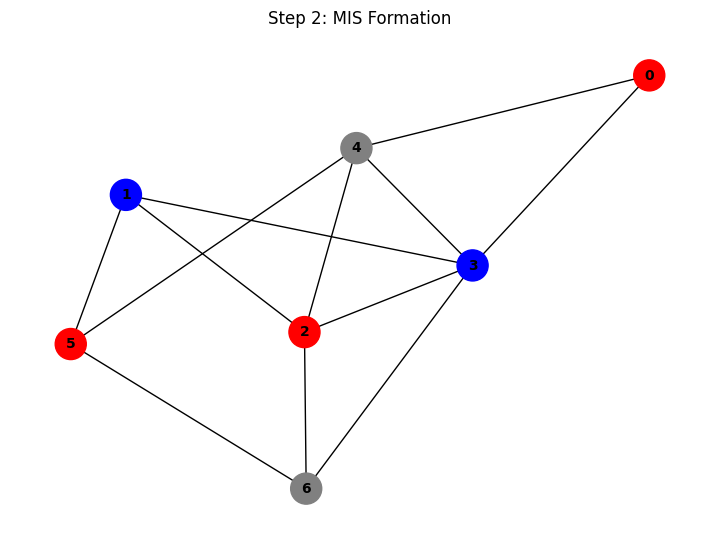

Step 4: Unvisited node 4 explored and marked blue.


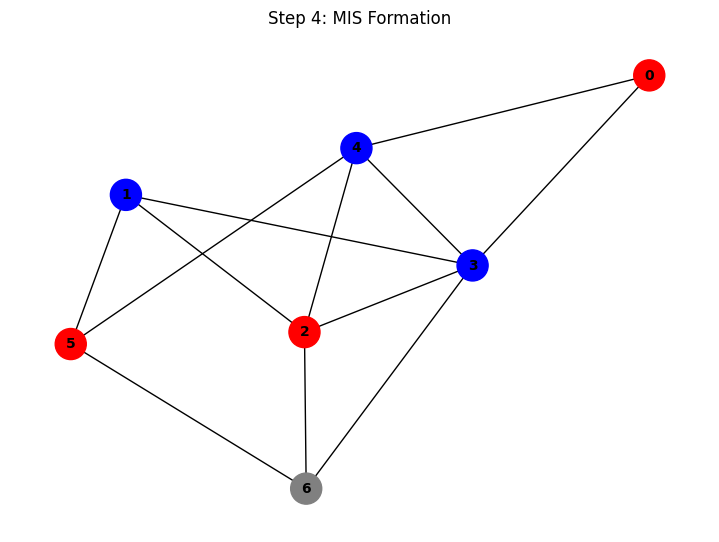

Step 5: Unvisited node 6 explored and marked blue.


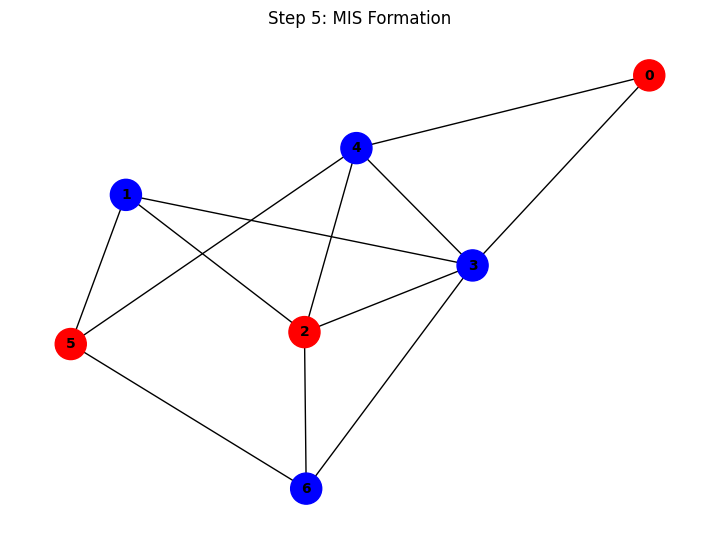


Exploration completed!

Final MIS (nodes in red):
[0, 2, 5]


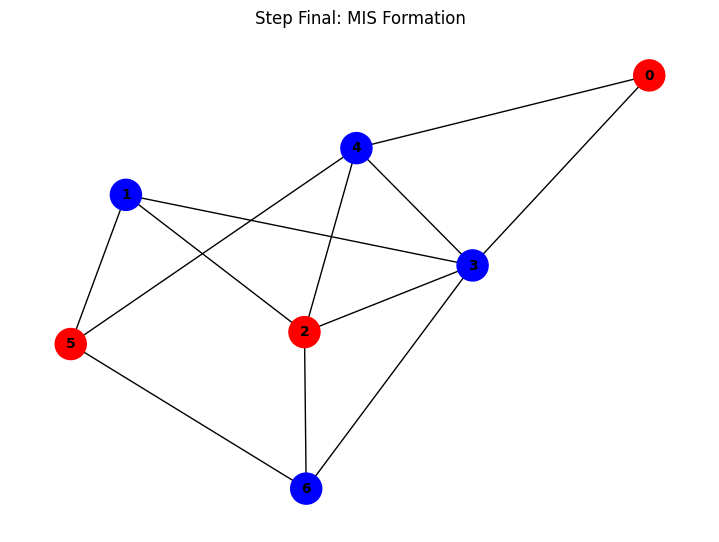

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import time

# Define the Agent class to represent individual agents navigating the graph
class Agent:
    def __init__(self, agent_id, start_node):
        self.agent_id = agent_id  # Unique identifier for the agent
        self.current_node = start_node  # Current position of the agent in the graph
        self.state = 'scout'  # State of the agent: 'scout' (exploring) or 'return' (backtracking)
        self.phase = 'forward'  # Phase of exploration: 'forward' (exploring new nodes) or 'backtrack'
        self.settled = False  # Indicates if the agent has settled at a node
        self.parent = None  # Keeps track of the parent node for backtracking

# Define the MISGraph class to handle the graph and agent operations
class MISGraph:
    def __init__(self, adj_list):
        self.adj_list = adj_list  # Adjacency list representation of the graph
        self.agents = []  # List of agents exploring the graph
        self.node_colors = {node: 'grey' for node in adj_list.keys()}  # Initialize all nodes as 'grey'
        self.visited_nodes = set()  # Set to track visited nodes

    # Initialize agents at a starting node
    def initialize_agents(self, num_agents, start_node):
        for i in range(num_agents):
            agent = Agent(agent_id=i + 1, start_node=start_node)
            self.agents.append(agent)

    # Visualize the graph with agents and their positions
    def visualize_graph(self, step):
        G = nx.Graph()
        # Add edges to the graph
        for node, neighbors in self.adj_list.items():
            for neighbor in neighbors:
                G.add_edge(node, neighbor)

        # Layout for graph visualization
        pos = nx.spring_layout(G, seed=42)  # Consistent layout for visualization
        node_colors = [self.node_colors[node] for node in G.nodes]

        plt.figure(figsize=(7, 5))  # Fixed image size
        nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=500, font_size=10, font_weight='bold')

        # Display active agents as icons above nodes
        for agent in self.agents:
            if not agent.settled:  # Only show agents still exploring
                agent_pos = pos[agent.current_node]
                agent_pos_above = (agent_pos[0], agent_pos[1] + 0.15)  # Offset for agent icon
                plt.text(agent_pos_above[0], agent_pos_above[1], '👤', fontsize=18, ha='center', va='center', color='green')

        plt.title(f"Step {step}: MIS Formation")
        plt.axis('off')  # Hide axes for cleaner visualization
        plt.show()
        time.sleep(0.5)  # Pause to display visualization

    # Explore all nodes in the graph to form a Maximal Independent Set (MIS)
    def explore_all_nodes(self):
        step = 0

        # Initialize the root node as part of the MIS
        root_node = self.agents[0].current_node
        self.node_colors[root_node] = 'red'  # Root node becomes 'red' (part of MIS)
        self.visited_nodes.add(root_node)  # Mark root as visited
        self.agents[0].settled = True  # Root agent is settled
        print(f"Step {step}: Root node {root_node} settled (red).")
        self.visualize_graph(step)

        # Iteratively explore the graph
        while True:
            step += 1
            movements = []  # Track agent movements in this step

            for agent in self.agents:
                if agent.settled:  # Skip agents that are already settled
                    continue

                current_node = agent.current_node
                neighbors = self.adj_list[current_node]
                unsettled_neighbors = [n for n in neighbors if n not in self.visited_nodes]

                if agent.phase == 'forward':  # Forward phase: exploring neighbors
                    if unsettled_neighbors:
                        # Move to the next unsettled neighbor
                        next_node = unsettled_neighbors[0]
                        agent.parent = current_node
                        agent.current_node = next_node
                        self.visited_nodes.add(next_node)
                        movements.append((agent.agent_id, current_node, next_node))

                        # Decide the color of the node based on its neighbors
                        neighbor_colors = [self.node_colors[n] for n in self.adj_list[next_node]]
                        if 'red' in neighbor_colors:
                            self.node_colors[next_node] = 'blue'  # Neighbor in MIS, mark as 'blue'
                        else:
                            self.node_colors[next_node] = 'red'  # No MIS neighbor, mark as 'red'
                            agent.settled = True  # Agent settles at this node
                    else:
                        agent.phase = 'backtrack'  # No unsettled neighbors, backtrack

                elif agent.phase == 'backtrack':  # Backtrack phase
                    if agent.parent is not None:
                        parent_node = agent.parent
                        agent.current_node = parent_node
                        agent.phase = 'forward'  # Resume forward exploration
                        movements.append((agent.agent_id, current_node, parent_node))

            if movements:  # If any agent moved, display the changes
                for move in movements:
                    print(f"Step {step}: Agent {move[0]} moved from node {move[1]} to node {move[2]}.")
                self.visualize_graph(step)
            else:
                break  # Terminate if no movements occur

        # Handle unvisited nodes after exploration
        unvisited_nodes = set(self.adj_list.keys()) - self.visited_nodes
        for node in unvisited_nodes:
            step += 1
            self.visited_nodes.add(node)
            neighbor_colors = [self.node_colors[n] for n in self.adj_list[node]]
            if 'red' in neighbor_colors:
                self.node_colors[node] = 'blue'  # Neighbor in MIS, mark as 'blue'
            else:
                self.node_colors[node] = 'red'  # No MIS neighbor, mark as 'red'
            print(f"Step {step}: Unvisited node {node} explored and marked {self.node_colors[node]}.")
            self.visualize_graph(step)

        print("\nExploration completed!")

# Example adjacency list for the graph
adjacency_list = {
    0: [3, 4],
    1: [2, 3, 5],
    2: [1, 3, 4, 6],
    3: [0, 1, 2, 4, 6],
    4: [0, 2, 3, 5],
    5: [1, 4, 6],
    6: [2, 3, 5]
}

# Input number of agents and starting node
num_agents = int(input("Enter the number of agents: "))
start_node = int(input("Enter the starting node: "))

# Run the algorithm
mis_graph = MISGraph(adjacency_list)
mis_graph.initialize_agents(num_agents, start_node)
mis_graph.explore_all_nodes()

# Display the final MIS
print("\nFinal MIS (nodes in red):")
final_mis = [node for node, color in mis_graph.node_colors.items() if color == 'red']
print(final_mis)
mis_graph.visualize_graph("Final")


# ***Detailed Explaination***

## **Overview**
- **Goal:** To form a **Maximal Independent Set (MIS)** in a given graph represented by an adjacency list.
- **Key Features:**
  - Multiple agents traverse the graph to identify the MIS nodes.
  - The graph is visualized step-by-step during the traversal process.
  - Each node in the graph is color-coded to indicate its state:
    - **Red:** Part of the MIS.
    - **Blue:** Neighbor of a red node, not part of the MIS.
    - **Grey:** Unvisited nodes.

---

## **Code Breakdown**

### **1. Class Definitions**
#### **Agent Class**
Represents an agent that traverses the graph.
- **Attributes:**
  - `agent_id`: Unique identifier for the agent.
  - `current_node`: The node where the agent is currently located.
  - `state`: Indicates whether the agent is in `'scout'` or `'return'` state.
  - `phase`: Indicates the direction of traversal (`'forward'` for exploration, `'backtrack'` for returning to a parent node).
  - `settled`: Boolean indicating whether the agent has settled at a node.
  - `parent`: The parent node of the agent, used for backtracking.

#### **MISGraph Class**
Handles the graph structure, agent operations, and visualization.
- **Attributes:**
  - `adj_list`: The adjacency list representation of the graph.
  - `agents`: List of agents traversing the graph.
  - `node_colors`: Dictionary mapping nodes to their colors (`'grey'`, `'red'`, `'blue'`).
  - `visited_nodes`: Set of nodes visited by agents.

---

### **2. Key Functions**
#### **Initialization Functions**
- `__init__`: Initializes the graph, agents list, and node colors.
- `initialize_agents(num_agents, start_node)`:
  - Creates and initializes agents at the specified starting node.

#### **Visualization**
- `visualize_graph(step)`:
  - Uses **NetworkX** and **Matplotlib** to visualize the graph.
  - Nodes are color-coded, and agents are represented as green icons (`👤`) above the nodes.

#### **Core Algorithm**
- `explore_all_nodes()`: Implements the MIS formation algorithm.
  - **Step-by-step process:**
    1. **Initialization:**
       - The root node is marked as part of the MIS (`red`), and its neighbors are marked as `blue`.
    2. **Agent Movement:**
       - Agents traverse the graph to explore all nodes.
       - During exploration:
         - Nodes are added to the MIS if none of their neighbors are already in the MIS.
         - Nodes are marked as `blue` if a neighbor is in the MIS.
       - Agents backtrack when no new neighbors are available.
    3. **Unvisited Nodes:**
       - Any remaining unvisited nodes are marked and assigned appropriate colors based on their neighbors.
    4. **Completion:**
       - The MIS is finalized, and all nodes are either `red` or `blue`.

---

### **3. Input Parameters**
- **Adjacency List:** Defines the graph's structure. Example:
  ```python
  adjacency_list = {
      0: [3, 4],
      1: [2, 3, 5],
      ...
  }
  ```
- **Number of Agents:** Total agents used for exploration.
- **Starting Node:** The node where all agents start.

---

### **4. Output**
#### **Console Output:**
- **Step-by-step updates:** Shows each agent's movement and node status changes.
- **Final MIS:** List of nodes that belong to the MIS (colored `red`).

#### **Graph Visualizations:**
- At each step, the graph is visualized to show:
  - Node colors (`red`, `blue`, `grey`).
  - Agent positions (represented as `👤`).

---

### **5. Example Execution**
1. **Input:**
   ```
   Enter the number of agents: 2
   Enter the starting node: 0
   ```
2. **Output:**
   ```
   Step 0: Root node 0 settled (red).
   Step 1: Agent 1 moved from node 0 to node 3.
   Step 2: Agent 2 moved from node 0 to node 4.
   ...
   Final MIS (nodes in red):
   [0, 3, 5]
   ```

---

### **6. Customization**
- **Change the adjacency list:** Modify the graph structure as needed.
- **Adjust visualization settings:** Tweak node size, font size, and colors in `visualize_graph`.
- **Enhance agent behavior:** Add features like random exploration or weighted traversal.

---

## **Applications**
- Distributed algorithms for graph problems.
- Understanding MIS formation in networks.
- Teaching graph traversal concepts through visualizations.